In [30]:
import os

import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

In [81]:
price_df = pd.read_csv("gecko_price.csv", index_col=0)
mktcap_df = pd.read_csv("gecko_marketcap.csv", index_col=0)

price_df.index = pd.to_datetime(price_df.index)
mktcap_df.index = pd.to_datetime(mktcap_df.index)

In [104]:
daily_return = price_df.pct_change()

problematic_cols = []
for col in daily_return.columns:
    if daily_return[col].max() > 10000:
        problematic_cols.append(col)

daily_return = daily_return.drop(problematic_cols, axis=1)
mktcap_df = mktcap_df.drop(problematic_cols, axis=1)

In [105]:
screen_by_mktcap = mktcap_df.applymap(lambda x: 1 if x>1_000_000 else np.nan)

In [131]:
mktcap_df.apply(lambda x: 1 if x.max() > 1_000_000 else np.nan, axis=0).count()

495

In [132]:
tmp = []

for col in mktcap_df.columns:
    if mktcap_df[col].max() >= 1_000_000:
        tmp.append(col)

In [106]:
mktcap_df_screened = mktcap_df * screen_by_mktcap

In [107]:
mktcap_weight = mktcap_df.apply(lambda x: x/np.nansum(x), axis=1)

In [108]:
pf_mktcap_weighted = (daily_return*mktcap_weight).sum(axis=1)

In [ ]:
for col in daily_return.columns:
    if daily_return[col].max() > 100:
        print(col, daily_return[col].max(), daily_return.index[daily_return[col].argmax()])

In [124]:
problematic_idxs = []

count_before = 0
tmp = screen_by_mktcap.count(axis=1)
for idx in tqdm(screen_by_mktcap.index):
    target_val = tmp.loc[idx]
    if count_before != 0:
        if (target_val - count_before) / count_before < -0.5:
            #print(idx)
            problematic_idxs.append(idx)
    count_before = target_val

100%|██████████| 3593/3593 [00:00<00:00, 62159.24it/s]

2017-04-02 00:00:00
2017-06-06 23:29:55.701000
2017-06-08 23:39:21.692000
2018-01-30 00:05:18.718000
2018-02-08 00:05:28.226000
2023-02-28 08:47:35


In [125]:
pf_mktcap_weighted = pf_mktcap_weighted.drop(problematic_idxs, axis=0)
screen_by_mktcap = screen_by_mktcap.drop(problematic_idxs, axis=0)

<AxesSubplot:>

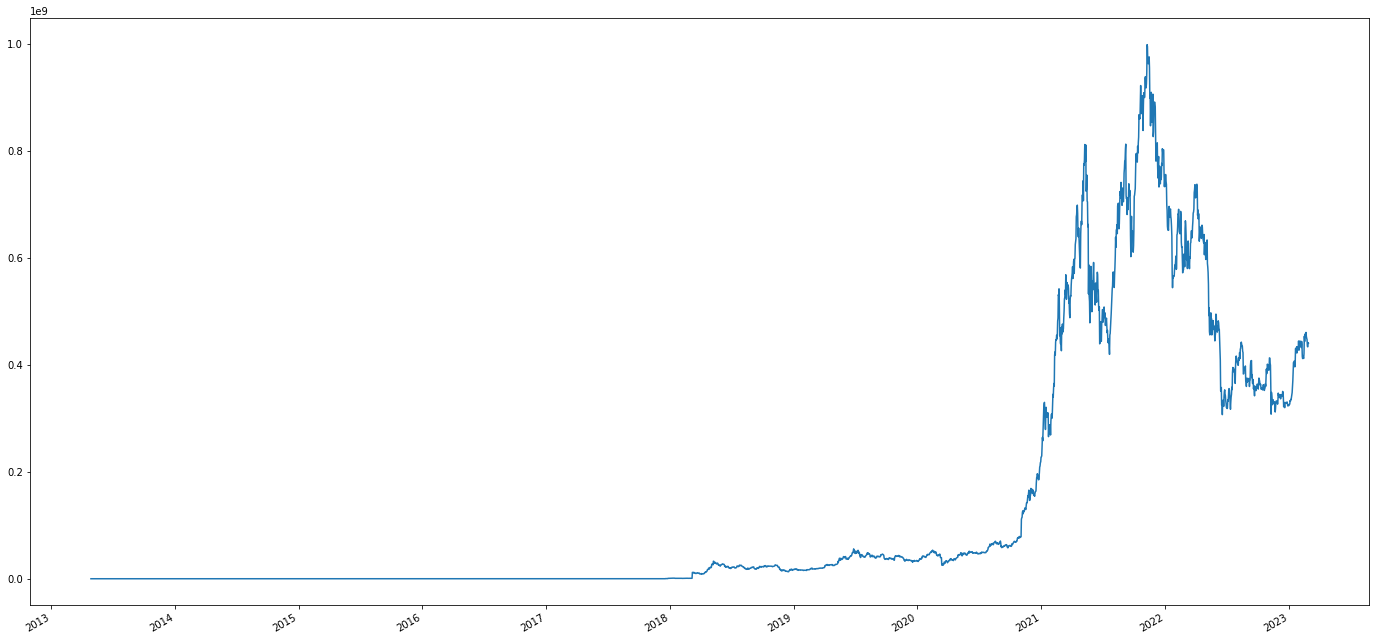

In [126]:
plt.figure(figsize=(24,12))
(pf_mktcap_weighted+1).cumprod().loc[:].plot()

<AxesSubplot:>

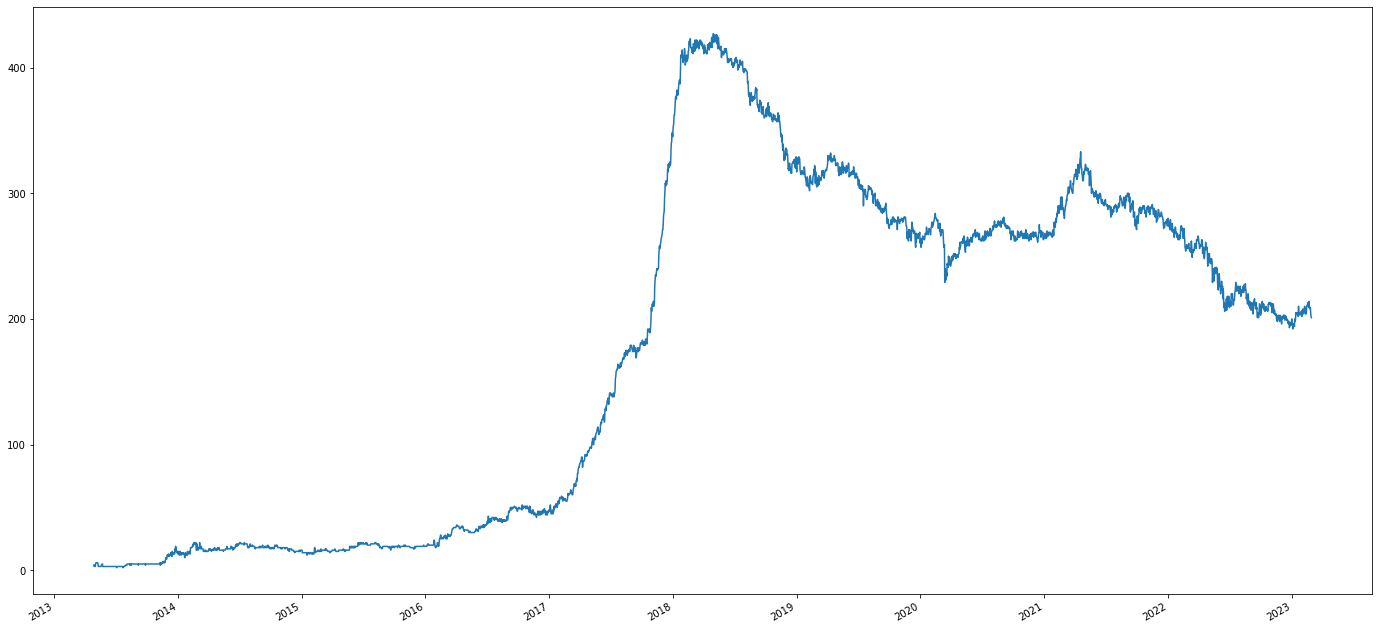

In [127]:
plt.figure(figsize=(24,12))
screen_by_mktcap.count(axis=1).plot()

In [24]:
mktcap_weight.sum(axis=1)

2013-04-28 00:00:00    1.0
2013-04-29 00:00:00    1.0
2013-04-30 00:00:00    1.0
2013-05-01 00:00:00    1.0
2013-05-02 00:00:00    1.0
                      ... 
2023-02-25 00:00:00    1.0
2023-02-26 00:00:00    1.0
2023-02-27 00:00:00    1.0
2023-02-28 00:00:00    1.0
2023-02-28 08:47:35    1.0
Length: 3593, dtype: float64